### Dataset description

The authors of the paper "DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS (2019)", have conducted a survey of willing subjects in an effort to determine effective predictors of divorces, in an effort to provide more insight to counsellors and therapists to better address issues with marriages and come up with more effective treatment / intervention plans as necessary.

Attributes are provided in the data dictionary below:
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

### Prepping EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('divorce.csv', delimiter=';')
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


It appears each question posed to the subjects is assigned to a column, and the responses recieved are measured between the range 0-4, in a Likert-like fashion. With this, we can assume the following:
- Likert like fasion of response gathering gives us 5 values, as we assume 0 is not a null value in this context.
- There are 170 subjects, where 49% were divorced and 51% were married - there is a slight imbalance of classes , so sampling must be done with caution. 

In [3]:
# first thing is to sample (randomize the data, using a random state so I can reproduce results)
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,3,1,1,0,0,0,0,0,0,0,...,3,2,2,0,2,2,0,0,4,0
1,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,1
2,0,1,1,0,0,2,0,0,0,0,...,2,2,2,0,2,1,1,1,0,0
3,4,3,3,2,4,1,0,3,3,2,...,4,4,4,4,4,4,4,4,4,1
4,0,0,2,4,0,0,0,0,0,2,...,2,0,2,4,0,0,1,0,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# correlation
correlation = shuffled_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

<AxesSubplot:>

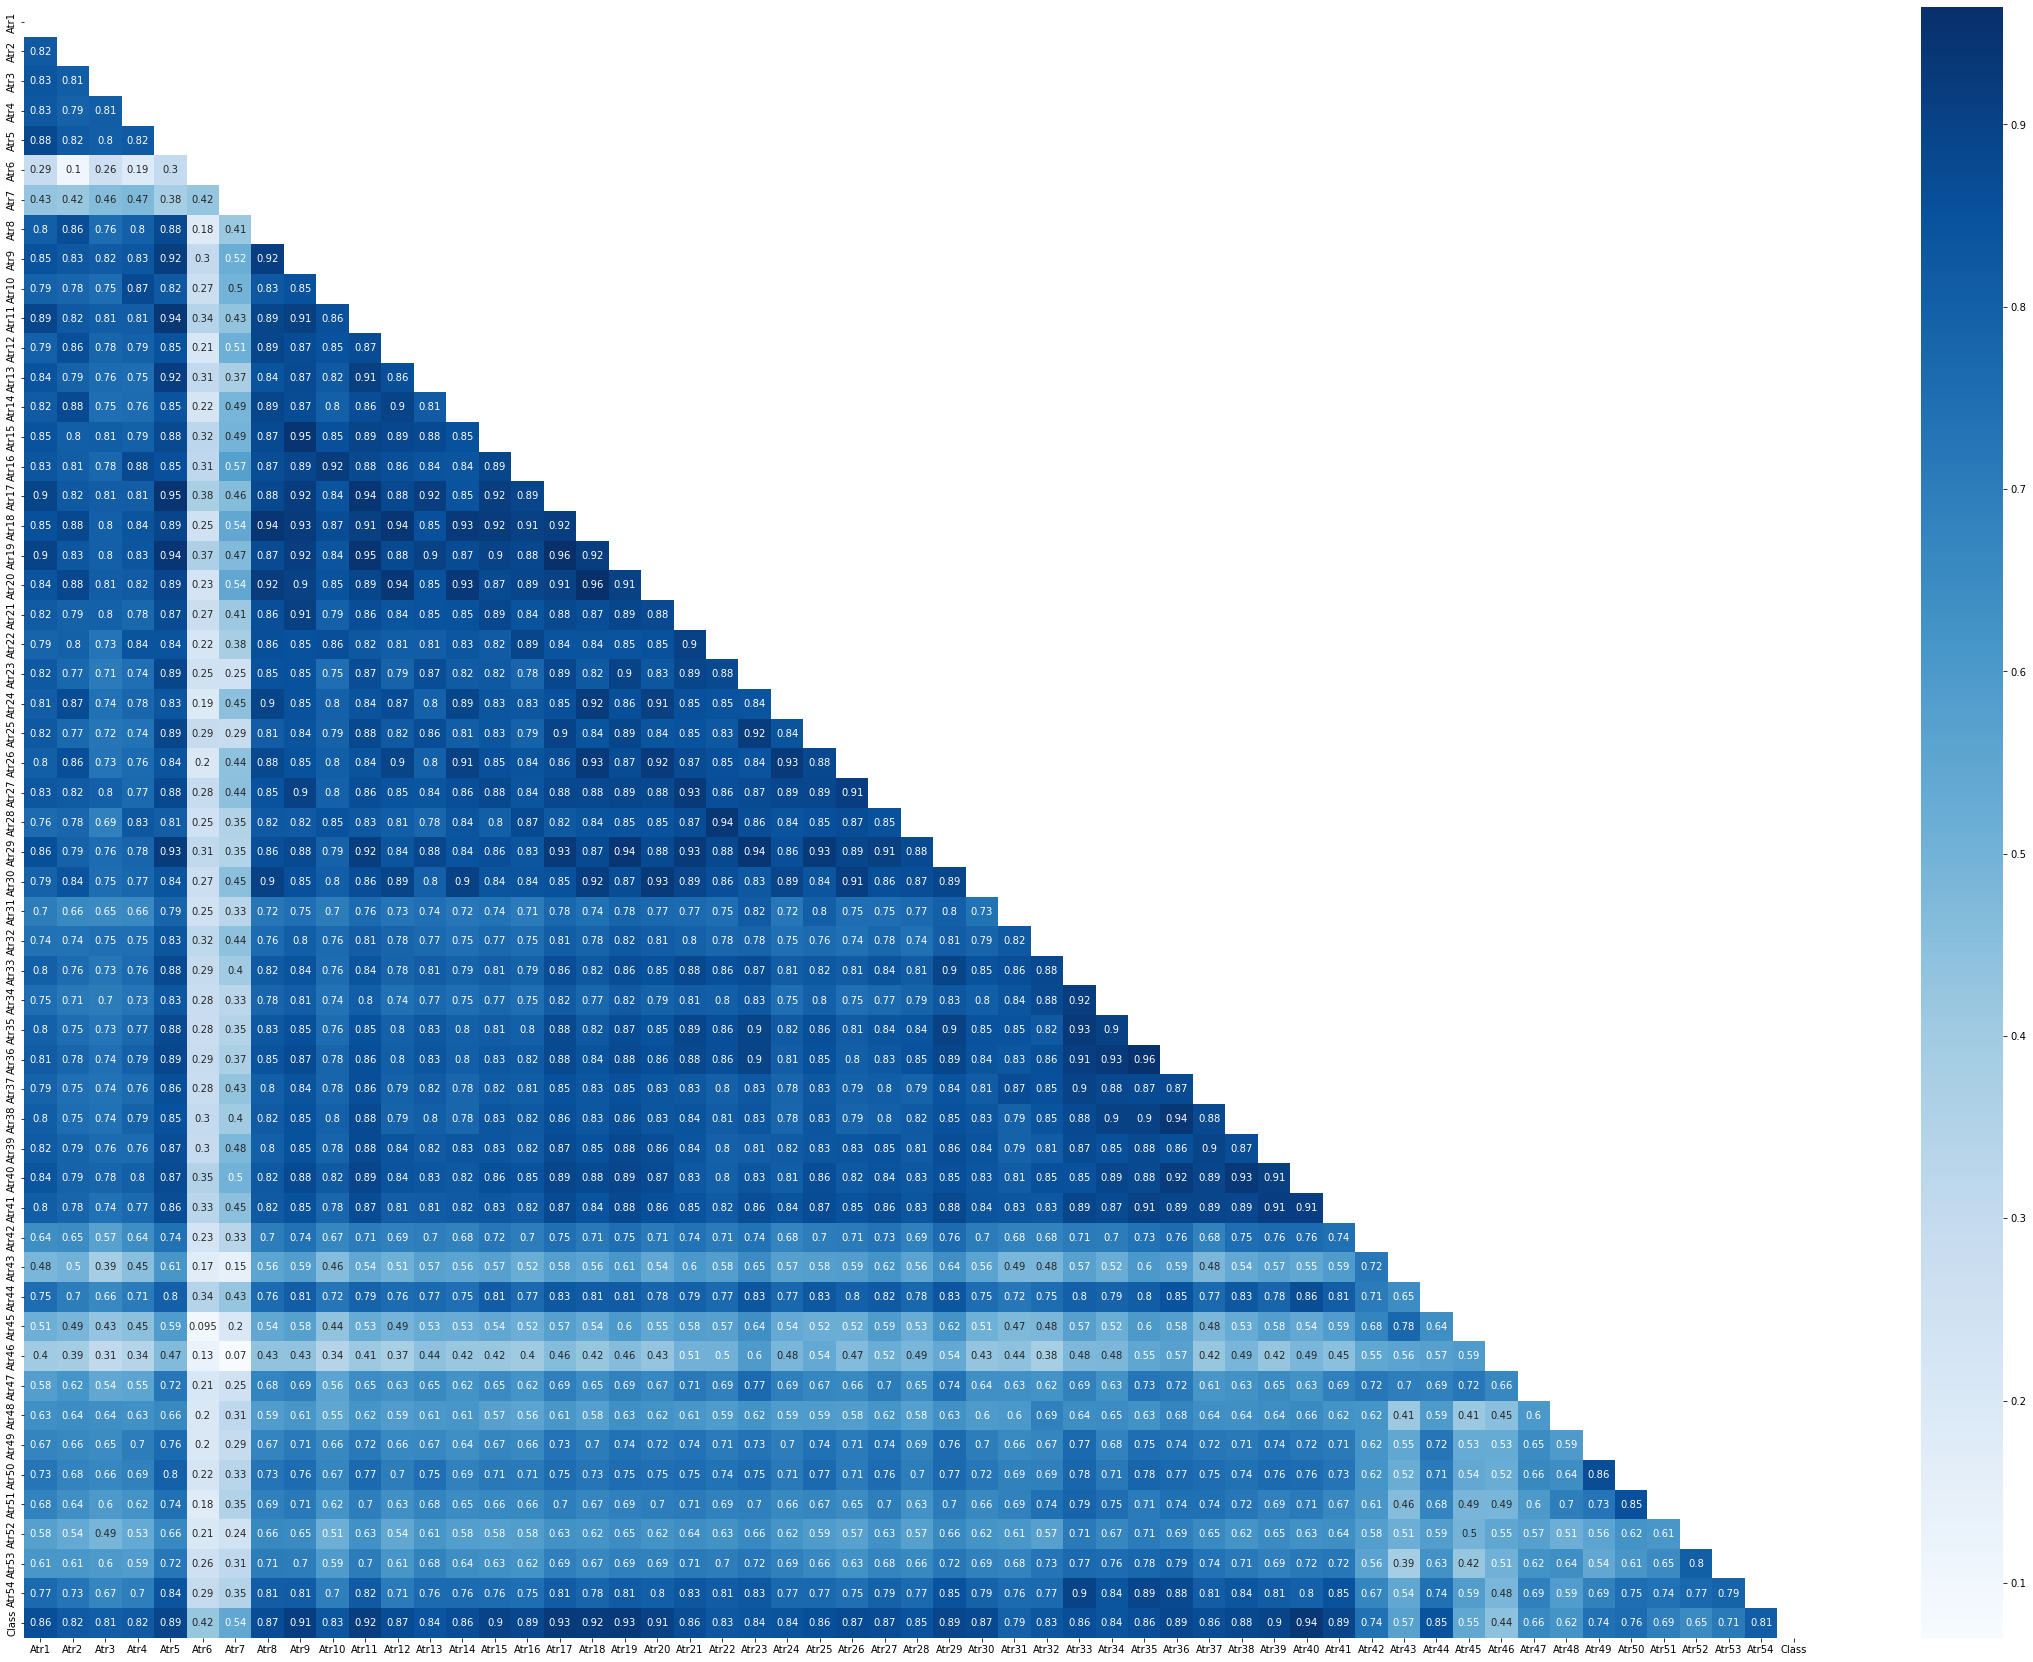

In [6]:
plt.figure(figsize=(40,30))
sns.heatmap(correlation, mask=mask, annot=True, cmap='Blues')

The correlation matrix shows us a multicollinearity problem within the dataset as a whole. This is also a high dimensional dataset. 

We can apply PCA to this to solve both issues.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [8]:
# scaling the data before applying PCA
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(shuffled_data), columns=shuffled_data.columns)

We can apply the PCA object to the entire dataset to figure out how many components are optimal, and then go from there.

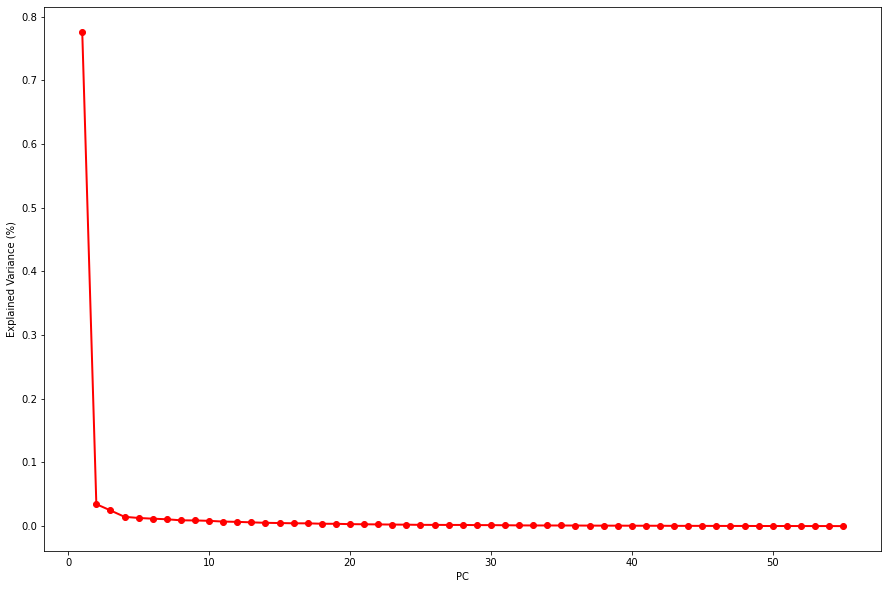

In [9]:
pca = PCA().fit(scaled_data)
pca_vals = np.arange(pca.n_components_) + 1

plt.figure(figsize=(15,10))
plt.plot(pca_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('PC')
plt.ylabel('Explained Variance (%)')
plt.show()

The scree plot indicates that the optimal components are between 2 and 3. We can also choose the amount of variance to be explained. The n_components parameter in this case will be 0.95 (95% of explained variance)

In [10]:
# split into X and Y
Y = scaled_data['Class']
X = scaled_data.drop(['Class'], axis=1)

In [11]:
# init and fit new PCA component 
pca = PCA(n_components=0.95)
pc_data = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pc_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                            'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [12]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-2.184075,-0.053635,-0.197249,-0.059051,0.122128,0.163244,0.133187,-0.092942,-0.374973,0.022387,-0.384694,0.558274,0.092832,0.070165,-0.200339,0.827908,0.685631
1,3.093813,-0.234828,-0.083358,0.325761,-0.100846,-0.068631,-0.499286,0.447699,0.323696,0.007870,-0.332551,0.129060,0.227349,-0.023723,-0.121096,-0.065701,0.039976
2,-2.373350,-0.049824,-0.312725,-0.201785,-0.091354,0.111105,-0.030742,-0.043769,0.283959,0.300167,0.178967,0.137287,0.200099,-0.249021,-0.109815,0.017264,-0.137282
3,3.115543,-0.471734,0.097108,-0.068595,0.060930,-0.006990,0.382165,0.364996,0.108828,0.230585,-0.252266,-0.004085,0.093007,-0.119303,-0.030186,0.014820,-0.006805
4,-2.172403,0.117222,-0.221590,-0.622257,0.196406,-0.082733,-0.313090,-0.450346,-0.699368,-0.052573,-0.187172,0.149407,-0.402170,-0.101762,-0.095943,-0.563191,-0.407018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.125238,-0.788953,0.564069,-0.262141,0.083409,0.242582,-0.388684,-0.090586,0.242700,-0.246208,0.218110,0.373532,0.012591,0.072461,-0.017580,-0.232362,0.182932
166,-2.531795,-0.671223,-0.355155,0.191757,0.348216,0.203575,-0.122773,0.019459,-0.120760,-0.203257,-0.102961,-0.038907,0.175441,-0.093210,0.356782,0.104768,-0.057689
167,3.384365,0.071426,-0.180196,0.412713,-0.089658,-0.234336,-0.661206,-0.245317,-0.166769,-0.049257,-0.010095,-0.100033,-0.012504,0.062160,-0.008668,0.113863,-0.023244
168,-2.532511,0.234163,-0.275797,0.100798,-0.270953,-0.236147,0.324511,-0.033073,-0.319852,-0.269114,-0.058319,0.038418,0.005585,-0.193381,0.042958,-0.012581,0.158873


In [13]:
# PCA interpretation dataframe
load_interpret = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4','PC5','PC6',
                                                            'PC7','PC8','PC9','PC10','PC11','PC12',
                                                            'PC13','PC14','PC15','PC16',
                                                            'PC17'], index=X.columns)
load_interpret

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Atr1,0.145324,0.134377,-0.023399,-0.043185,0.178655,0.100330,0.234221,0.021213,-0.103850,0.097029,-0.230720,0.159224,-0.154442,0.004749,0.254428,0.201015,0.147515
Atr2,0.127802,0.149595,-0.114713,0.156685,0.072841,-0.020263,-0.180522,0.115646,-0.041108,0.169996,-0.228507,0.120724,-0.045848,0.005119,-0.022898,0.064759,-0.079967
Atr3,0.116958,0.172197,0.016802,-0.016941,0.219948,0.133233,0.004227,0.018004,-0.084859,0.230037,-0.037276,0.302197,-0.180261,0.085720,0.006783,-0.391644,0.209821
Atr4,0.128902,0.165199,-0.008448,-0.025698,0.178043,0.004731,-0.125046,-0.344732,-0.309357,0.026784,-0.007381,0.023030,-0.182445,0.072425,0.076203,-0.095375,-0.223009
Atr5,0.156049,0.017737,-0.016450,-0.017480,0.104311,0.085398,0.197356,0.112873,-0.111584,0.090120,0.002997,-0.087176,0.065880,-0.010839,-0.041320,0.000696,-0.127067
Atr6,0.027639,0.010893,0.074459,-0.201181,-0.051836,0.226546,0.239355,-0.113326,0.304763,-0.105922,0.369339,0.133757,-0.153337,-0.280323,-0.070979,0.148133,-0.033982
Atr7,0.041367,0.148250,0.000683,-0.091236,0.013659,0.288075,-0.208939,-0.067345,0.252264,-0.187902,0.253811,0.140673,-0.066508,0.119797,0.072598,0.103318,0.089166
Atr8,0.142870,0.097125,-0.096054,0.216050,-0.059043,0.047817,-0.054343,0.017424,-0.048130,-0.015399,-0.061269,-0.061235,0.266193,-0.011050,-0.154320,0.009289,-0.065765
Atr9,0.147666,0.082959,-0.061510,0.003898,0.015242,0.171651,0.042983,-0.026029,-0.035519,-0.030356,0.071016,-0.011316,0.176407,0.031446,-0.068039,-0.211953,0.130944
Atr10,0.124001,0.184711,-0.037396,-0.056812,0.025607,-0.008899,-0.060609,-0.296603,-0.125346,-0.014785,0.139685,-0.224026,0.026890,0.106279,0.017252,0.038871,-0.107383


Now that we have our components, we can now split this data off into training and testing sets - followed by a classification model.

In [14]:
# partitioning into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pca_df,Y, test_size=0.25, random_state=42)

In [15]:
# check shape; might have to use .ravel()
print('Shapes: ', X_train.shape, X_test.shape, Y_train.shape, Y_train.shape)

Shapes:  (127, 17) (43, 17) (127,) (127,)


There are a number of classification models we can choose from:
- Logistic Regression
- Decision Trees
- Random Forests

The authors used a Perceptron model to achieve a result - but we will experiment first with Logistic Regression as a baseline,  and then try ensemble methods after to compare their performance. 

Note: We know that there are two classes within the dataset but not what they mean due to the lack of a dictionary.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
# create and fit LR model
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, Y_train)

LogisticRegression()

In [22]:
LR_pred = LR_classifier.predict(X_test)

In [27]:
#import metrics
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

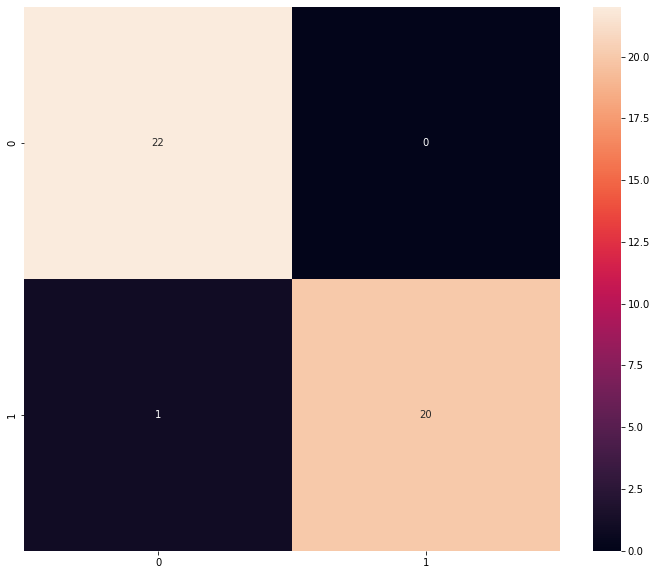

In [28]:
# visualizing confusion matrix
LR_cm = confusion_matrix(Y_test, LR_pred)

plt.figure(figsize=(12,10))
sns.heatmap(LR_cm, annot=True)

In [30]:
# classification report for LR classifier
LR_report = classification_report(Y_test, LR_pred)
print(LR_report)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



Well, an accuracy of 98% with an LR model is pretty good on the surface but we may need to investigate this further by checking for an overfitting model. The high precision and recall are also metrics that leads me to believe that we need to investigate this model's results further.